In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0.5, 1.0, 'PLACEMENT DATA')

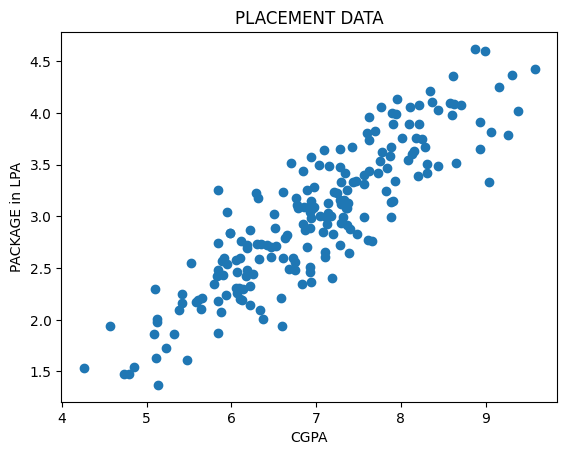

In [4]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE in LPA')
plt.title("PLACEMENT DATA")

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [8]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
lr.predict(X_test.iloc[0].values.reshape(1,1))


C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0.5, 1.0, 'PLACEMENT DATA')

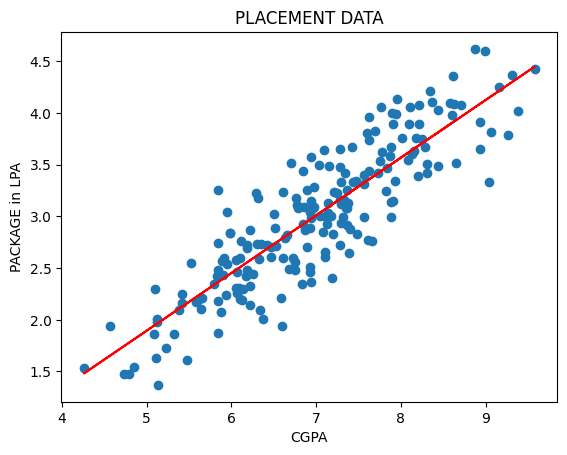

In [11]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train),  color='red')
plt.xlabel('CGPA')
plt.ylabel('PACKAGE in LPA')
plt.title("PLACEMENT DATA")

In [12]:
# slope
m = lr.coef_

In [13]:
# intercept 
b = lr.intercept_

In [14]:
# y = mX + b
m * 8.58 + b

array([3.89111601])

In [15]:
# all prediction values

list = []
for cgpa in X_test['cgpa']:
    
    result = m * cgpa + b
    list.append(result)
    
    print(result)

[3.89111601]
[3.09324469]
[2.38464568]
[2.57434935]
[1.6537286]
[1.77647803]
[2.07219258]
[2.93143862]
[3.76278706]
[2.93701814]
[4.09197872]
[3.51170867]
[2.97049525]
[2.40138424]
[3.18809652]
[3.46707251]
[1.94386362]
[3.24389172]
[2.97607477]
[3.41685683]
[2.55761079]
[3.16577844]
[2.85890486]
[3.12114229]
[3.68467378]
[2.8700639]
[3.49497011]
[3.34432308]
[3.91901361]
[1.96060218]
[3.65119666]
[3.2104146]
[3.74046898]
[2.7863711]
[2.78079158]
[3.27178932]
[3.52844723]
[2.61340599]
[2.65804215]
[2.71383735]


In [21]:
y_pred = np.array(list)

In [23]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.780730147510384